<a href="https://colab.research.google.com/github/Kajaree/DTClassifier/blob/master/optimization_regularization_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install tensorflow datasets

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass
  
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [0]:
# Load a toy dataset for the sake of this example
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [0]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [0]:
sgd = tf.keras.optimizers.SGD(nesterov=True)

In [0]:
def build_model(regualarization_function=None):
  if regualarization_function is None:
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,), name='digits'),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
  ])
  elif regualarization_function=='l1':
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,), name='digits'),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l1(0.001)),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
  ])
  elif regualarization_function=='l2':
    model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,), name='digits'),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
  ])
  return model

def run_model(model, x_train, y_train, x_test, y_test, x_val, y_val, optimization_func='sgd'):
  model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=25, batch_size=32, verbose=0)
  test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=32)
  
  return history, test_loss, test_accuracy


In [0]:
model_1 = build_model()
model_2 = build_model()
model_3 = build_model(regualarization_function='l1')
model_4 = build_model(regualarization_function='l2')

In [10]:
history_model_1, test_loss_model_1, test_accuracy_model_1 = run_model(model_1, x_train, y_train, x_test, y_test, x_val, y_val)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
history_model_2, test_loss_model_2, test_accuracy_model_2 = run_model(model_1, x_train, y_train, x_test, y_test, x_val, y_val, optimization_func=sgd)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
history_model_3, test_loss_model_3, test_accuracy_model_3 = run_model(model_1, x_train, y_train, x_test, y_test, x_val, y_val, optimization_func=sgd)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
history_model_4, test_loss_model_4, test_accuracy_model_4 = run_model(model_1, x_train, y_train, x_test, y_test, x_val, y_val, optimization_func=sgd)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

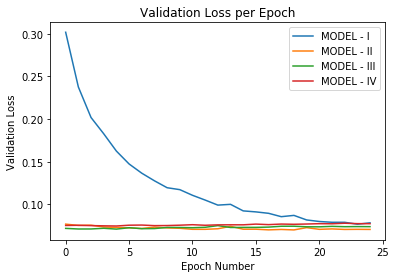

In [14]:
plt.plot(history_model_1.history['val_loss'])
plt.plot(history_model_2.history['val_loss'])
plt.plot(history_model_3.history['val_loss'])
plt.plot(history_model_4.history['val_loss'])
plt.xlabel('Epoch Number')
plt.ylabel("Validation Loss")
plt.title('Validation Loss per Epoch')
plt.legend(['MODEL - I', 'MODEL - II', 'MODEL - III', 'MODEL - IV'], loc='upper right')

plt.show()

In [15]:
print('Accuracy on test dataset for Model - I:', test_accuracy_model_1)
print('Accuracy on test dataset for Model - II:', test_accuracy_model_2)
print('Accuracy on test dataset for Model - III:', test_accuracy_model_3)
print('Accuracy on test dataset for Model - IV:', test_accuracy_model_4)

Accuracy on test dataset for Model - I: 0.9764
Accuracy on test dataset for Model - II: 0.9796
Accuracy on test dataset for Model - III: 0.9808
Accuracy on test dataset for Model - IV: 0.9814
